In [6]:
library(tidyverse)
library(ggplot2)
library(FactoMineR)
library(factoextra)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



## The basics of plotting using ggplot2

## Where you provide the function the following parameters:

 - DATA = The dataframe you’re looking to plot
 - GEOM_FUNCTION = The specific type of graph you’re trying to generate (whether it be a histogram, scatter plot, etc)
 - MAPPINGS = What data you want to correspond to what axis / what relationships between variables you want to represent in your graph
Let’s take a look at one of the data sets we’re going to work with today (one of my favorites): the starwars dataset that’s included with the tidyverse package:



In [21]:
head(starwars,10)

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112.0,none,masculine,Tatooine,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope",,
R2-D2,96,32,NA,"white, blue",red,33.0,none,masculine,Naboo,Droid,"The Empire Strikes Back, Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",,
Darth Vader,202,136,none,white,yellow,41.9,male,masculine,Tatooine,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope",,TIE Advanced x1
Leia Organa,150,49,brown,light,brown,19.0,female,feminine,Alderaan,Human,"The Empire Strikes Back, Revenge of the Sith , Return of the Jedi , A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,
Beru Whitesun lars,165,75,brown,light,blue,47.0,female,feminine,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,
R5-D4,97,32,NA,"white, red",red,NA,none,masculine,Tatooine,Droid,A New Hope,,
Biggs Darklighter,183,84,black,light,brown,24.0,male,masculine,Tatooine,Human,A New Hope,,X-wing


# Bar Graphs

This is perhaps the simplest type of graph that can be made using ggplot. Here the height of your bars represents the frequency of a given observation. Let’s start by exploring how many of each gender type is represented in the starwars datset:

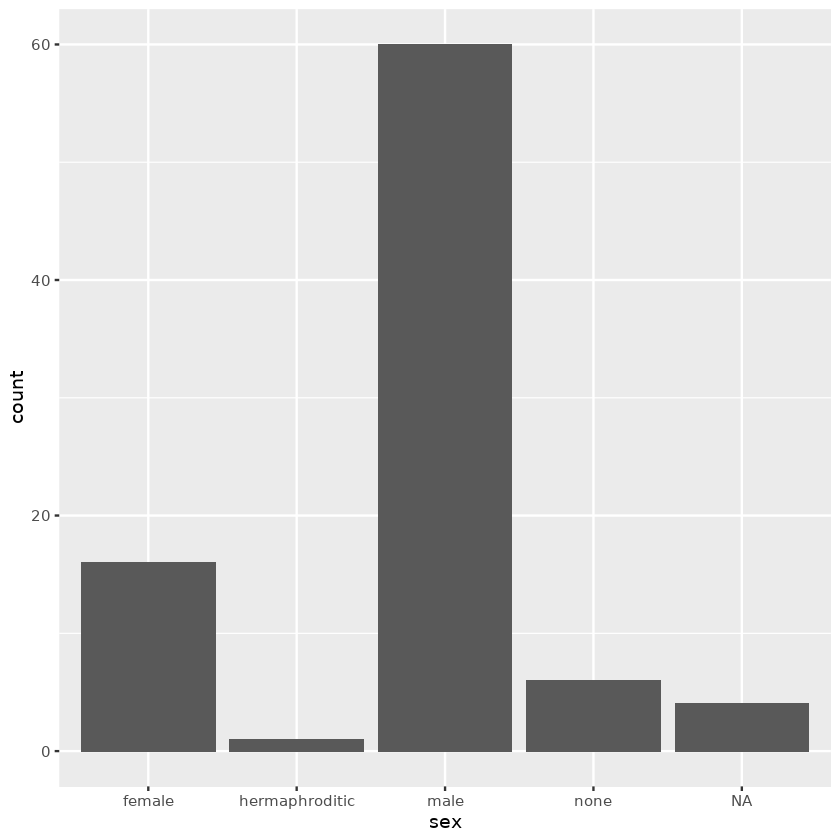

In [22]:
ggplot(data = starwars) +
  geom_bar(mapping = aes(x = `sex`))

Let’s get rid of those missing values:

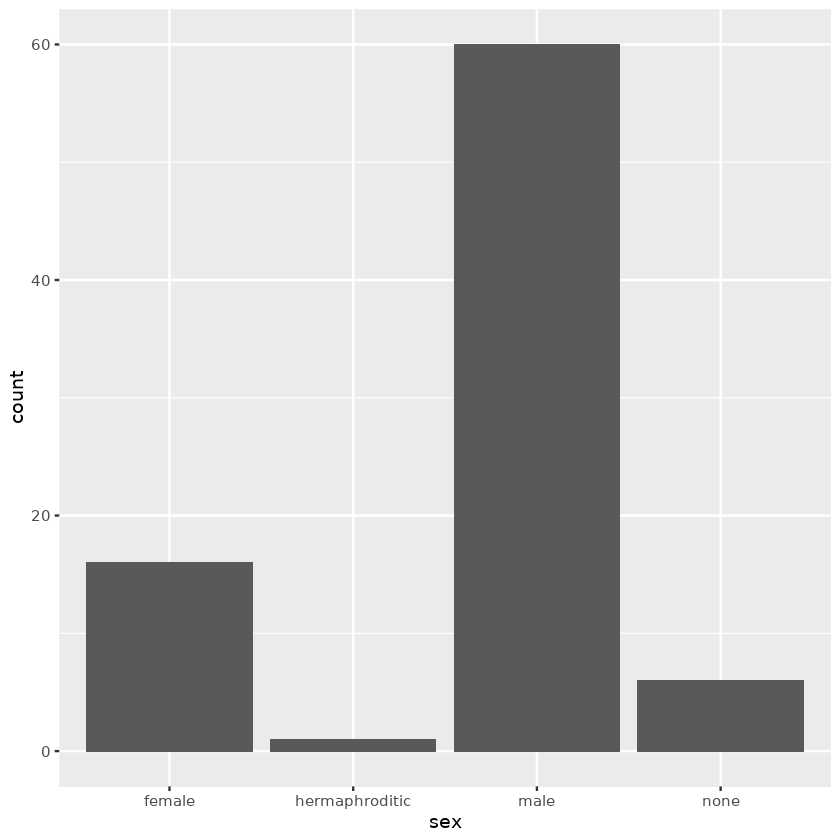

In [23]:
ggplot(data = subset(starwars, !is.na(`sex`))) +
  geom_bar(mapping = aes(x = `sex`))

Now let’s start getting fancy with our graph! Let’s start by changing the x axis label to the phrase “Known Genders” instead:

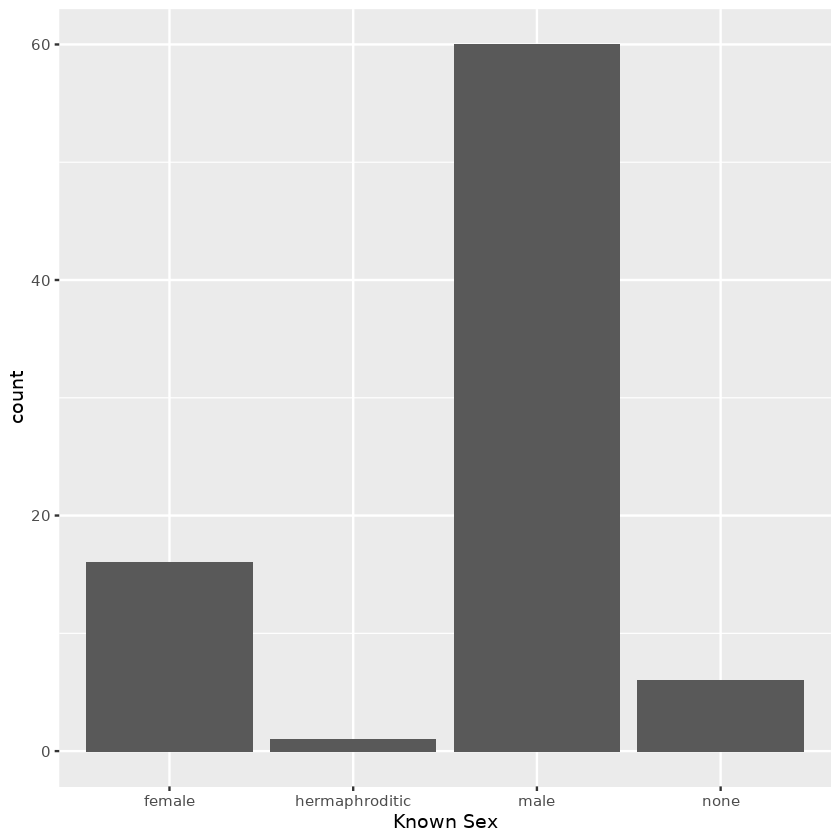

In [27]:
ggplot(data = subset(starwars, !is.na(`sex`))) +
  geom_bar(mapping = aes(x = `sex`)) +
  xlab("Known Sex")

Let’s change the y-axis label to “Frequency” instead:

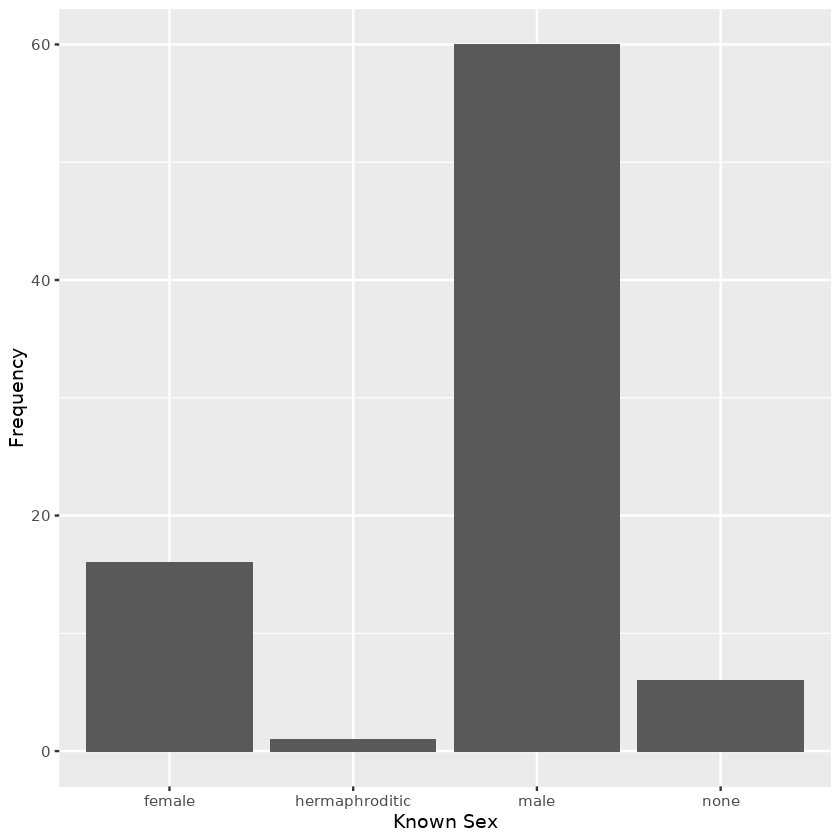

In [29]:
ggplot(data = subset(starwars, !is.na(`sex`))) +
  geom_bar(mapping = aes(x = `sex`)) +
  xlab("Known Sex") +
  ylab("Frequency")

Finally, let’s give this graph a title “Genders in the Star Wars Universe”:

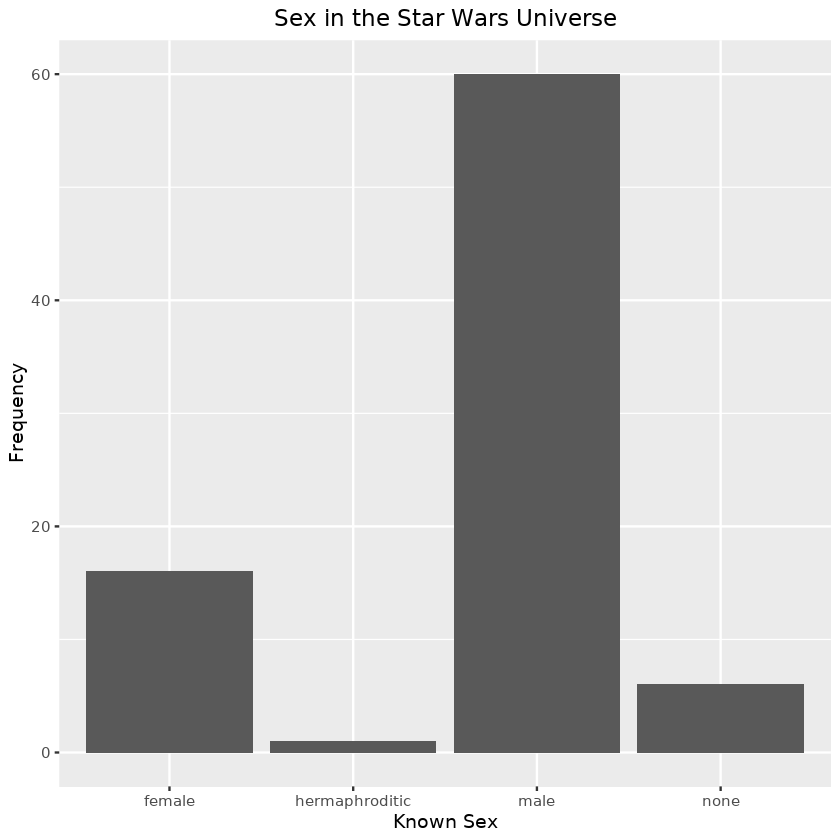

In [32]:
ggplot(data = subset(starwars, !is.na(`sex`))) +
  geom_bar(mapping = aes(x = `sex`)) +
  xlab("Known Sex") +
  ylab("Frequency") +
  ggtitle("Sex in the Star Wars Universe") +
  theme(plot.title = element_text(hjust = 0.5)) # This line centers the title on the graph

We can also plot color-code the bar plot by using the fill / color options:

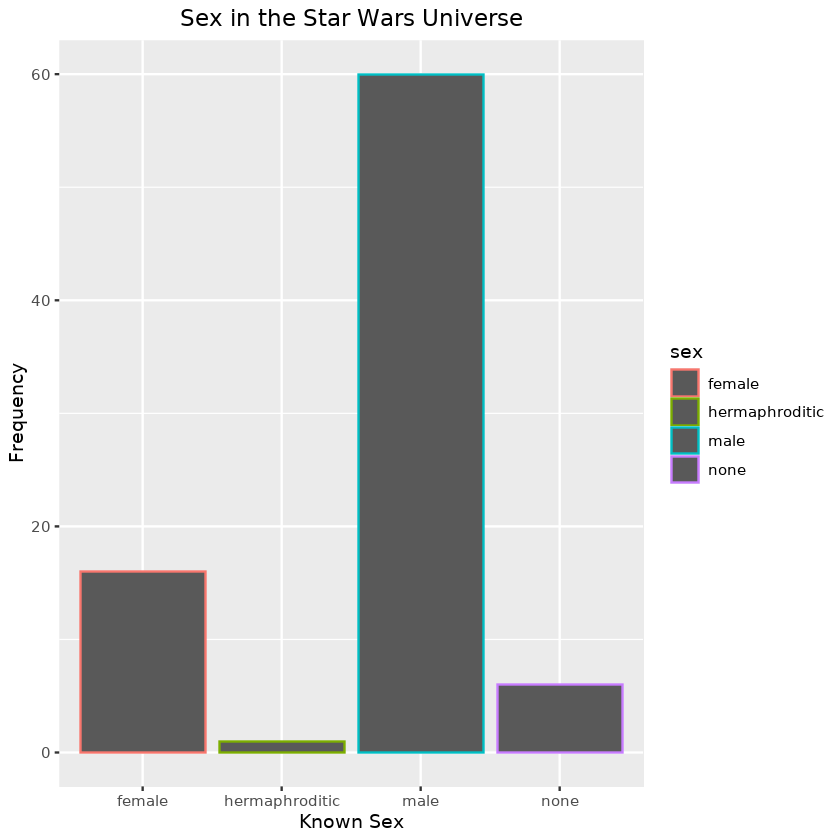

In [33]:
ggplot(data = subset(starwars, !is.na(`sex`))) +
  geom_bar(mapping = aes(x = `sex`, colour = `sex`)) +
  xlab("Known Sex") +
  ylab("Frequency") +
  ggtitle("Sex in the Star Wars Universe") +
  theme(plot.title = element_text(hjust = 0.5)) 

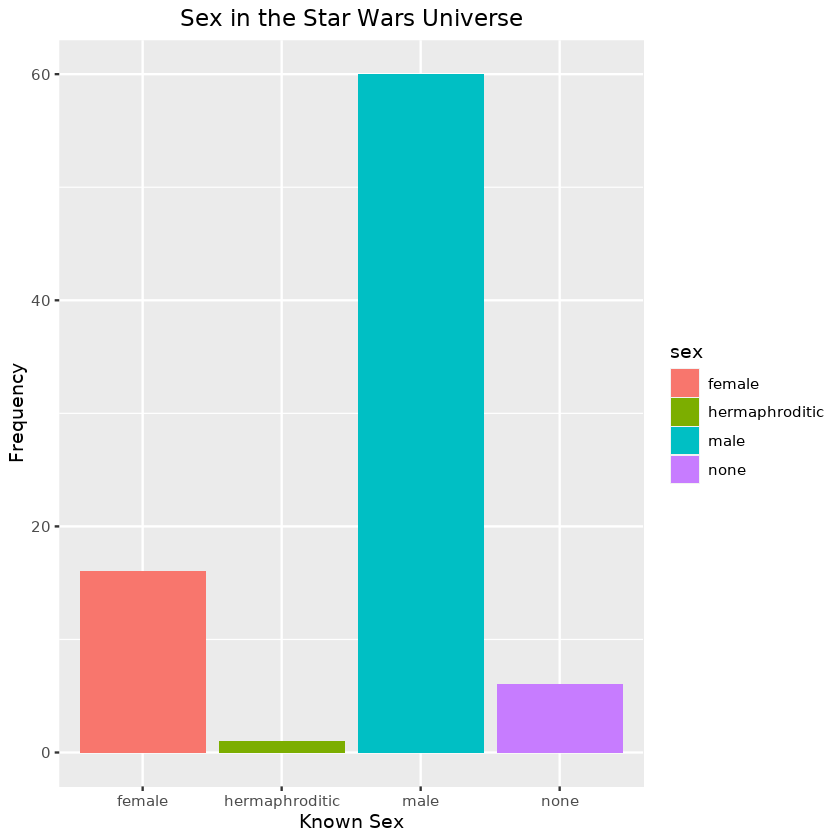

In [34]:
ggplot(data = subset(starwars, !is.na(`sex`))) +
  geom_bar(mapping = aes(x = `sex`, fill = `sex`)) +
  xlab("Known Sex") +
  ylab("Frequency") +
  ggtitle("Sex in the Star Wars Universe") +
  theme(plot.title = element_text(hjust = 0.5))

You can also flip this bar graph:

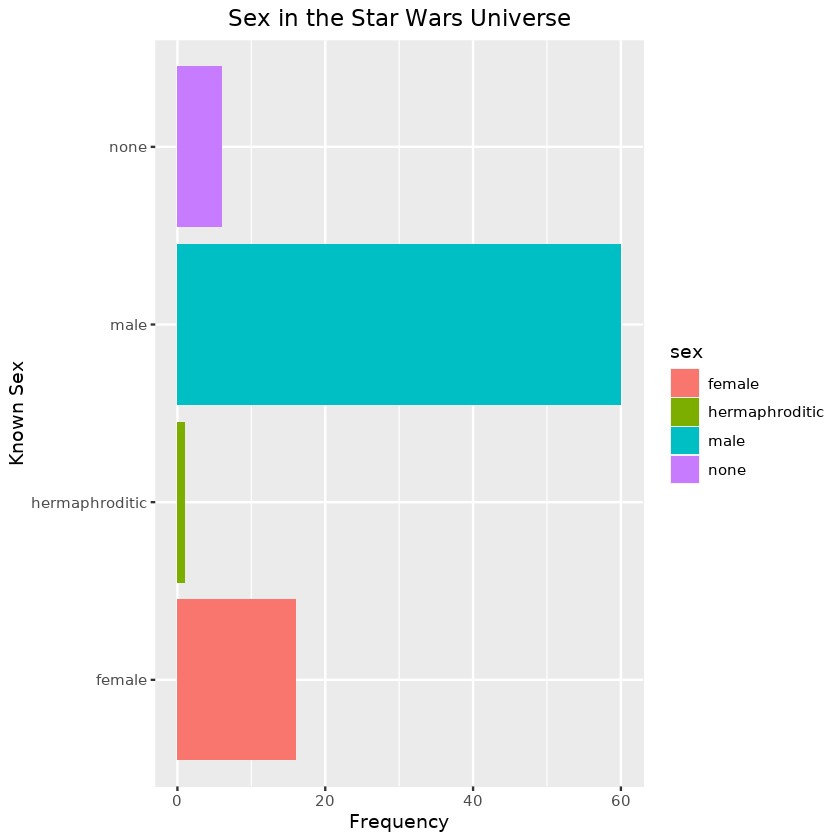

In [36]:
ggplot(data = subset(starwars, !is.na(`sex`))) +
  geom_bar(mapping = aes(x = `sex`, fill = `sex`)) +
  xlab("Known Sex") +
  ylab("Frequency") +
  ggtitle("Sex in the Star Wars Universe") +
  theme(plot.title = element_text(hjust = 0.5)) +
  coord_flip()

We can also use the fill argument to show relations between two variables

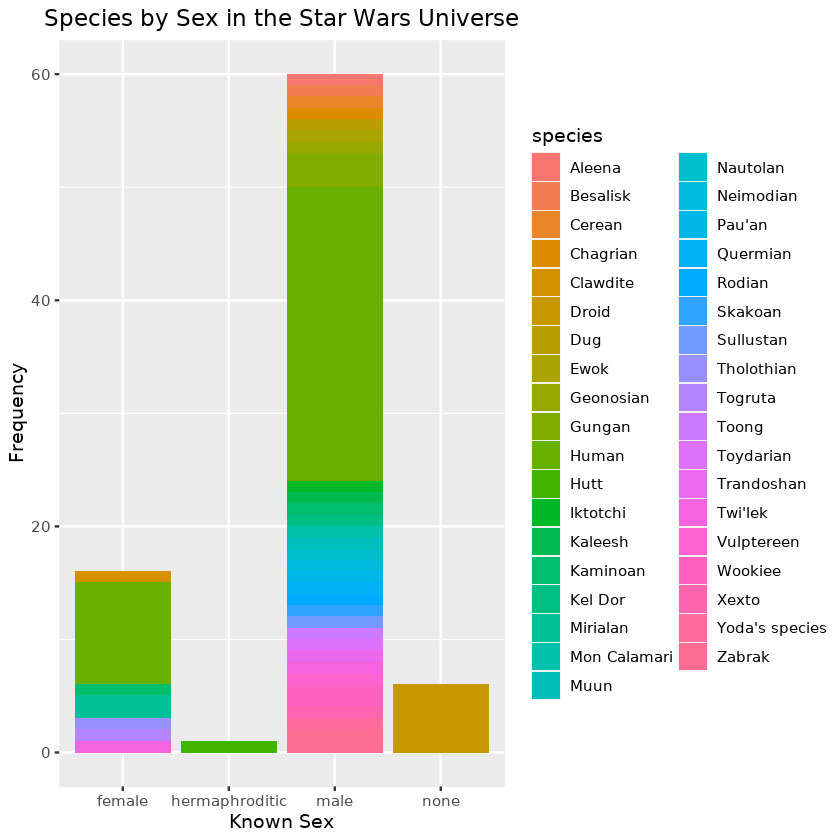

In [37]:
ggplot(data = subset(starwars, !is.na(`sex`))) +
  geom_bar(mapping = aes(x = `sex`, fill = `species`)) +
  xlab("Known Sex") +
  ylab("Frequency") +
  ggtitle("Species by Sex in the Star Wars Universe") +
  theme(plot.title = element_text(hjust = 0.5))

This graph is a little busy though, so for the purposes of our lesson let’s subset to only some of the species:

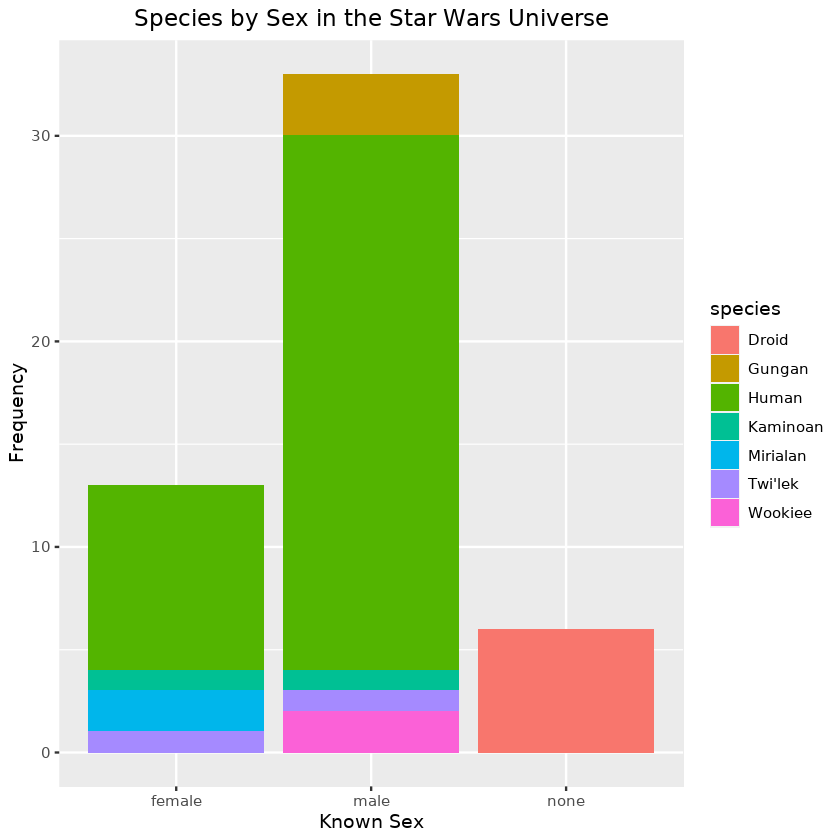

In [38]:
subset(starwars, !is.na(`sex`)) %>% 
  filter(species=="Human" | species=="Gungan" | species=="Mirialan" | species=="Wookiee" | species=="Kaminoan" | species=="Twi'lek" | species=="Droid") %>%
  ggplot(data = .) +
  geom_bar(mapping = aes(x = `sex`, fill = `species`)) +
  xlab("Known Sex") +
  ylab("Frequency") +
  ggtitle("Species by Sex in the Star Wars Universe") +
  theme(plot.title = element_text(hjust = 0.5))

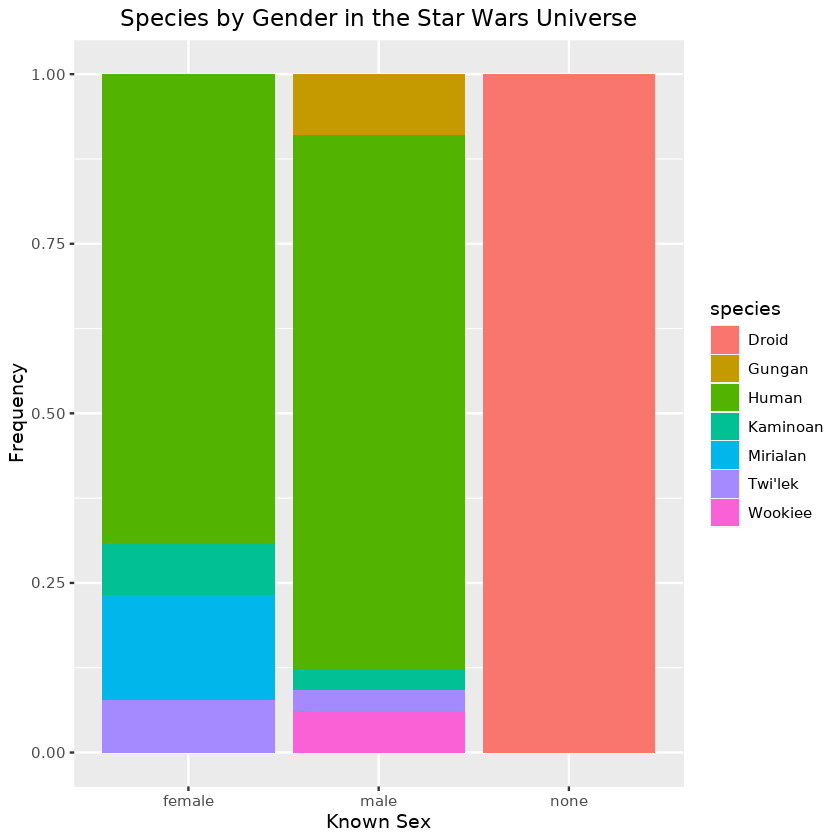

In [42]:
subset(starwars, !is.na(`sex`)) %>% 
  filter(species=="Human" | species=="Gungan" | species=="Mirialan" | species=="Wookiee" | species=="Kaminoan" | species=="Twi'lek" | species=="Droid") %>%
  ggplot(data = .) +
  geom_bar(mapping = aes(x = `sex`, fill = `species`), position = "fill") + #Change position to "fill"
  xlab("Known Sex") +
  ylab("Frequency") +
  ggtitle("Species by Gender in the Star Wars Universe") +
  theme(plot.title = element_text(hjust = 0.5))

Place overlapping objects next to each other:

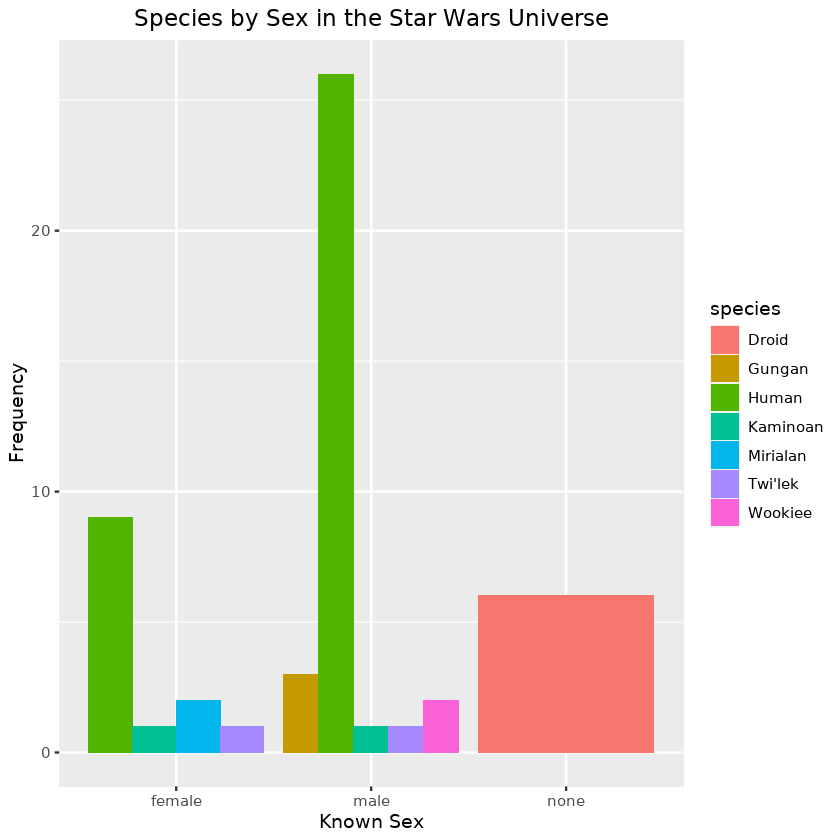

In [44]:
subset(starwars, !is.na(`sex`)) %>% 
  filter(species=="Human" | species=="Gungan" | species=="Mirialan" | species=="Wookiee" | species=="Kaminoan" | species=="Twi'lek" | species=="Droid") %>%
  ggplot(data = .) +
  geom_bar(mapping = aes(x = `sex`, fill = `species`), position = "dodge") +
  xlab("Known Sex") +
  ylab("Frequency") +
  ggtitle("Species by Sex in the Star Wars Universe") +
  theme(plot.title = element_text(hjust = 0.5))

# Excercise 1: 
- Used the previous code to plot hair_color instead of sex

# Stat Summary Graphs

We can also take a look at a certain variable parsed out by the conditions of another variable using the stat_summary visualization. In this case, let’s take a look at the average mass by gender in the star wars dataset:

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"`fun.ymin` is deprecated. Use `fun.min` instead."
Warning message:
"`fun.ymax` is deprecated. Use `fun.max` instead."
Warning message:
"Removed 28 rows containing non-finite values (stat_summary)."


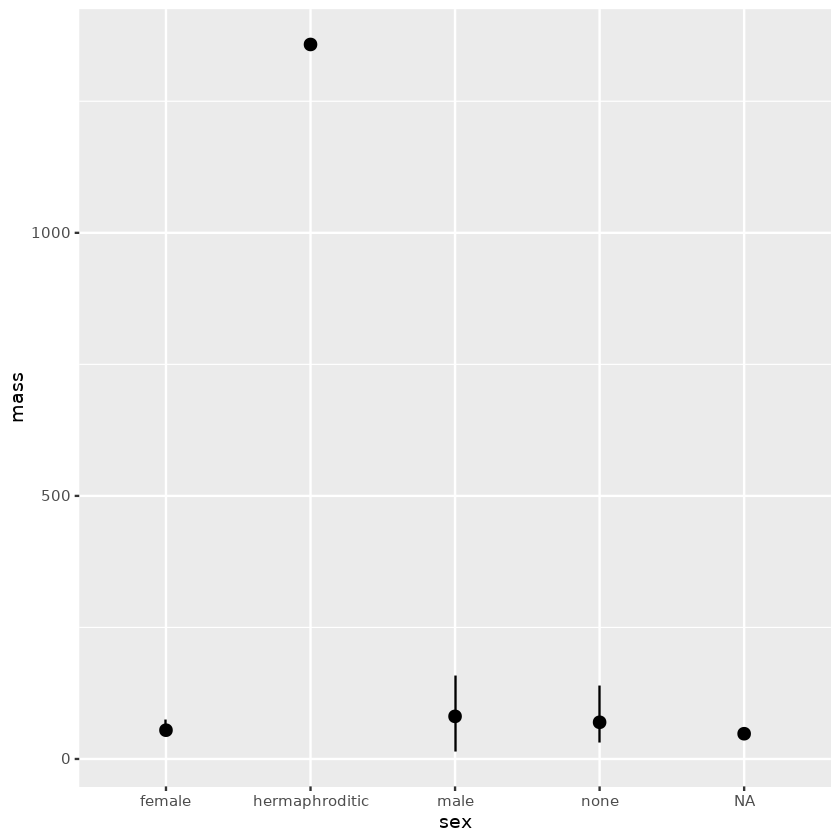

In [46]:
ggplot(data = starwars) + 
  stat_summary(
    mapping = aes(x = sex, y = mass),
    fun.min = min,
    fun.max = max,
    fun = mean
  )

While this visualization is more useful than a bar graph, all the data on the y-axis is scrunched up thanks to how heavy the hermaphrodites are. In this case let’s change the scale of our y-axis and see if that helps:

In [53]:
subset(starwars, starwars$sex == "hermaphroditic")

name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Jabba Desilijic Tiure,175,1358,NA,"green-tan, brown",orange,600,hermaphroditic,masculine,Nal Hutta,Hutt,"The Phantom Menace, Return of the Jedi, A New Hope",,


Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"`fun.ymin` is deprecated. Use `fun.min` instead."
Warning message:
"`fun.ymax` is deprecated. Use `fun.max` instead."
Warning message:
"Removed 28 rows containing non-finite values (stat_summary)."


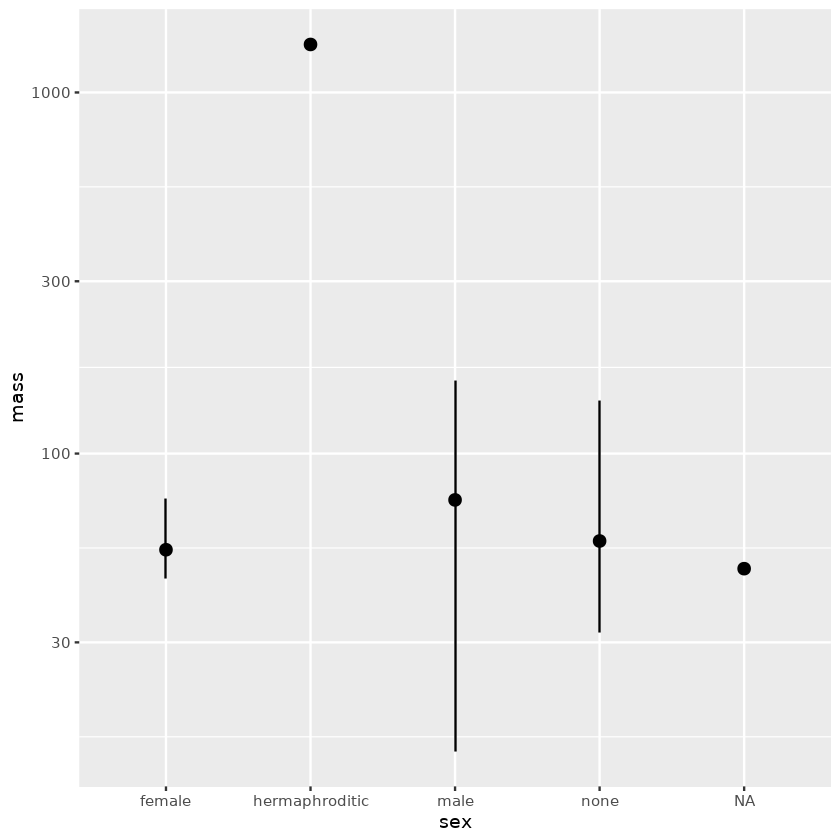

In [49]:
ggplot(data = starwars) + 
  scale_y_log10() +
  stat_summary(
    mapping = aes(x = sex, y = mass),
    fun.min = min,
    fun.max = max,
    fun = mean
  )

Again, let’s make our graph more visually appealing:

Warning message:
"Removed 28 rows containing non-finite values (stat_summary)."


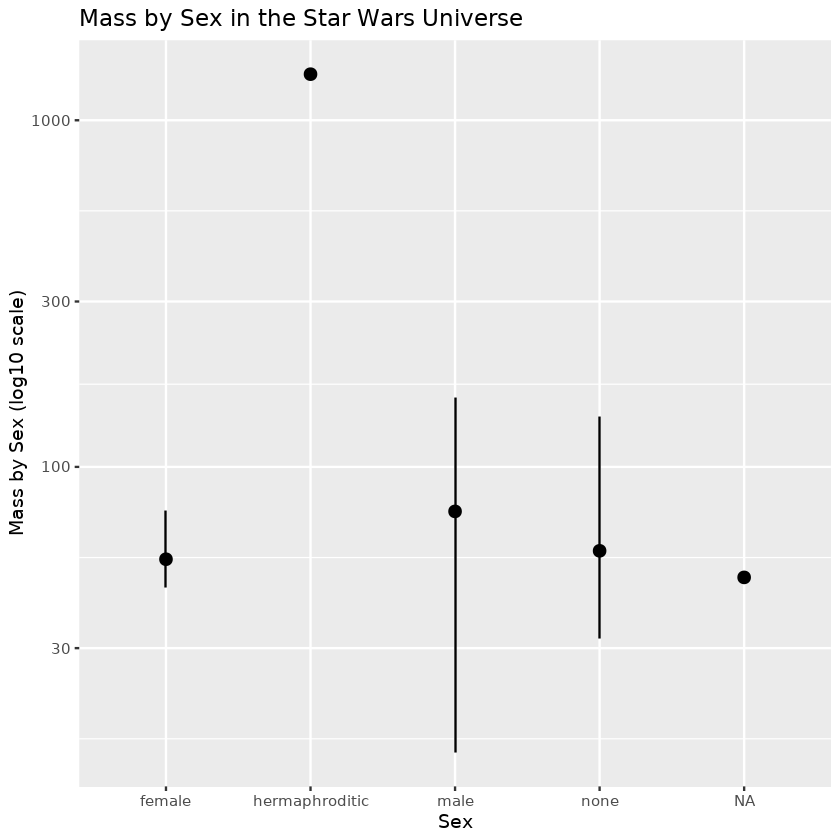

In [60]:
ggplot(data = starwars) + 
  scale_y_log10() +
  xlab("Sex") +
  ylab("Mass by Sex (log10 scale)") +
  ggtitle("Mass by Sex in the Star Wars Universe") +
  stat_summary(
    mapping = aes(x = sex, y = mass),
    fun.min = min,
    fun.max = max,
    fun = mean
  )

Let’s say that we also want to go ahead and change the order in which the genders are presented. To chage the order we have to specify it by calling the variables as factors and giving them a defined order:

Warning message:
"Removed 28 rows containing non-finite values (stat_summary)."


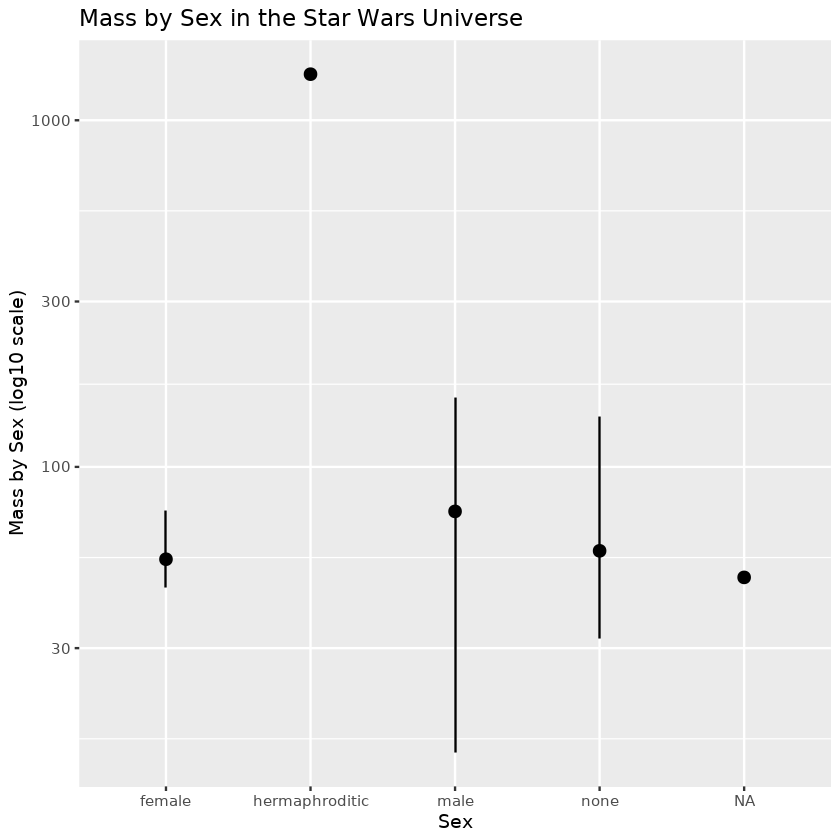

In [59]:
starwars$gender <- factor(starwars$gender, levels = c("female", "male", "hermaphrodite", "none", NA))
ggplot(data = starwars) + 
  scale_y_log10() +
  xlab("Sex") +
  ylab("Mass by Sex (log10 scale)") +
  ggtitle("Mass by Sex in the Star Wars Universe") +
  stat_summary(
    mapping = aes(x = sex, y = mass),
    fun.min = min,
    fun.max = max,
    fun = mean
  )

# Excercise 2:
- Use the previous code to plot height instead of mass

# Point Plot

For this section I will be using the mpg dataset. Probably the most common type of graph is the one of points on a cartesian plane. This is accomplished in ggplot using the geom_point command.

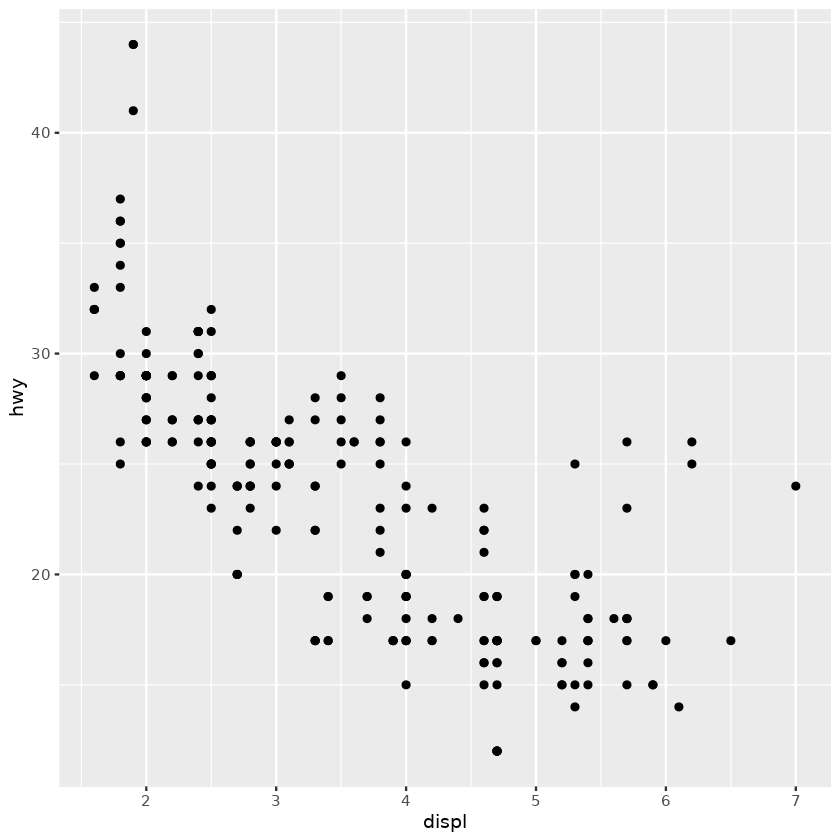

In [71]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

In [72]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


You can use variations on the point geometry to represent a variable within your dataset

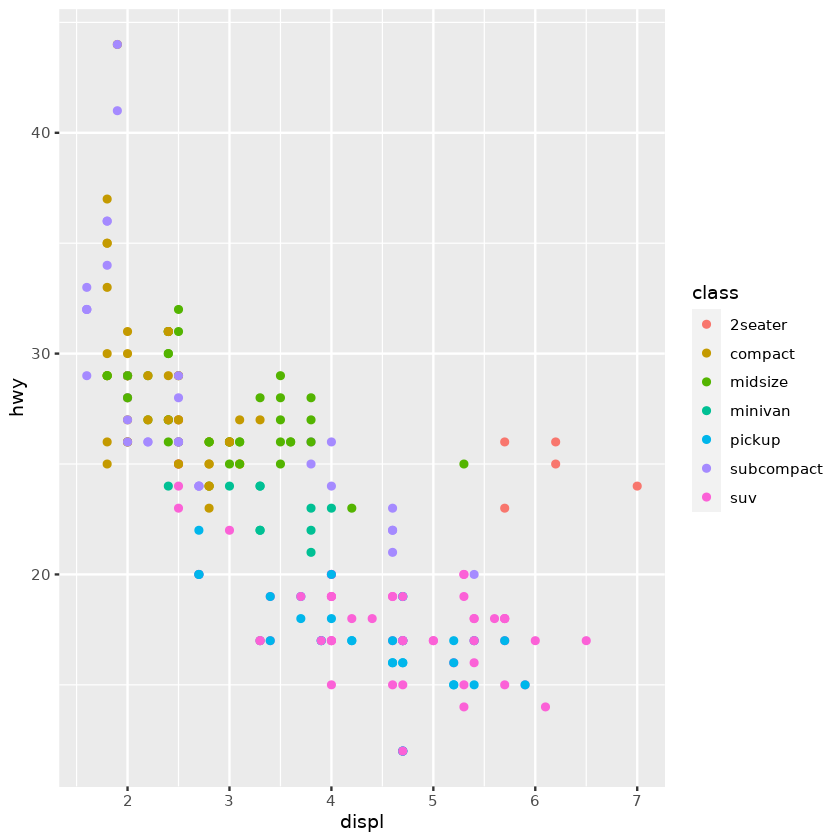

In [73]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

Warning message:
"Using size for a discrete variable is not advised."


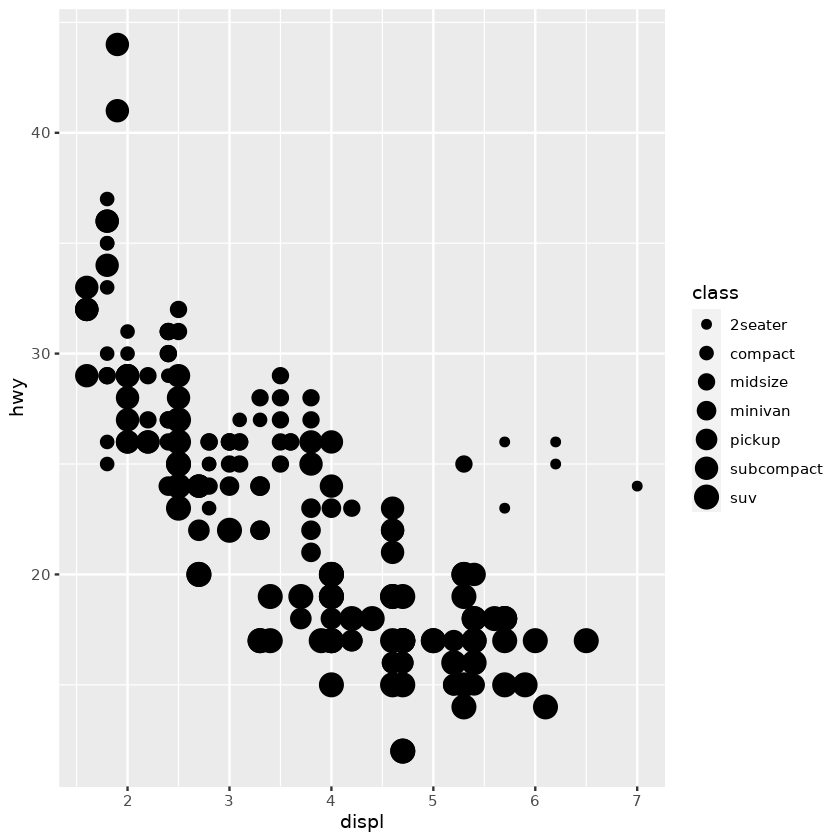

In [74]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = class))

Warning message:
"Using alpha for a discrete variable is not advised."


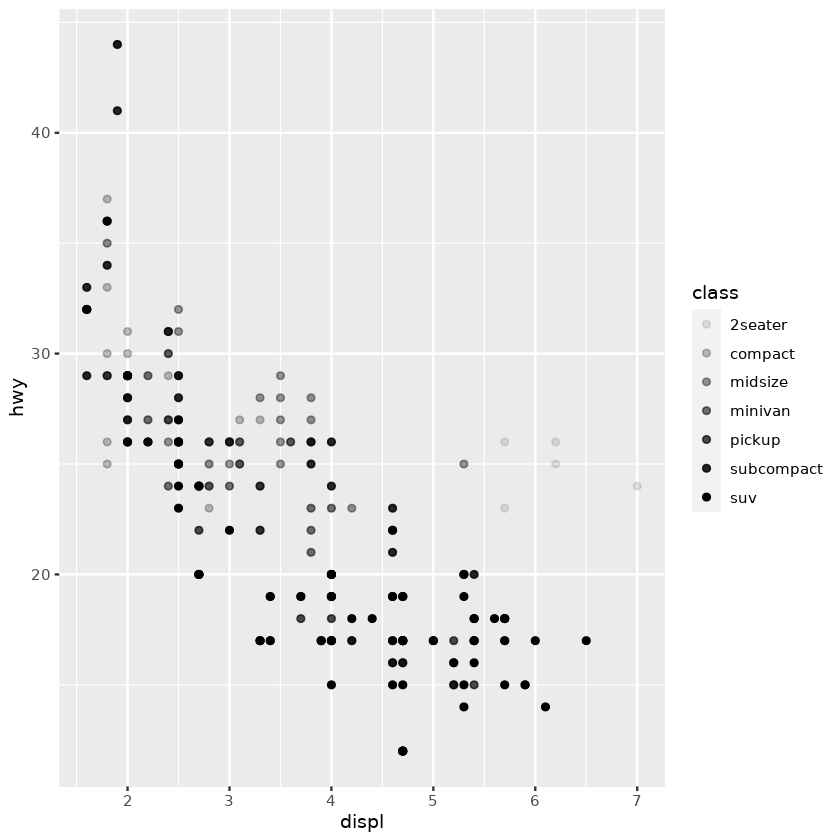

In [75]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."
Warning message:
"Removed 62 rows containing missing values (geom_point)."


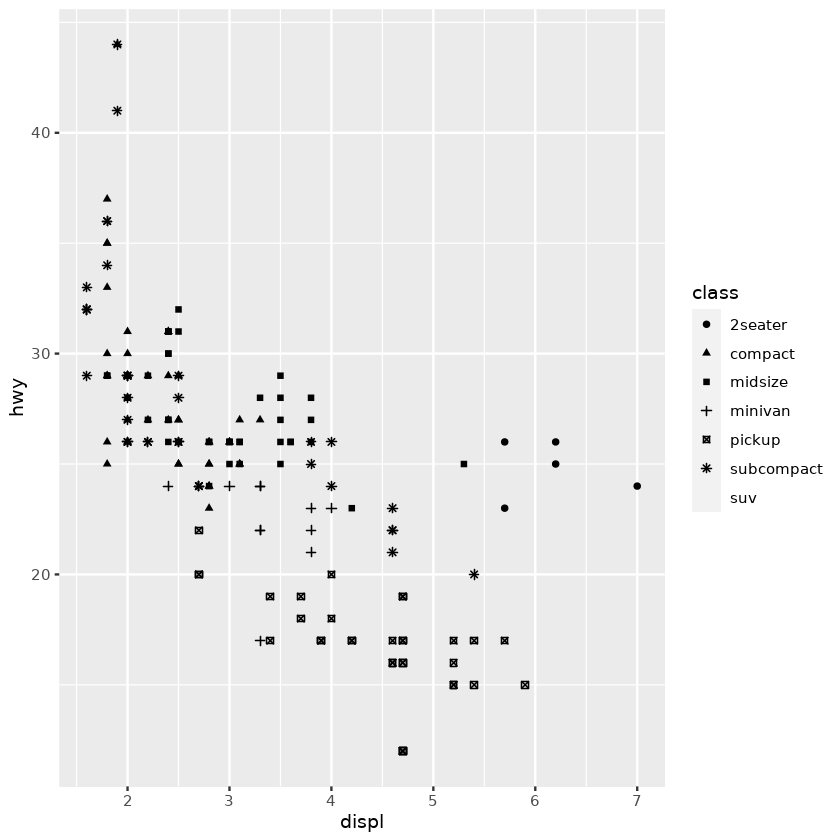

In [76]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

Most convenient is plotting the trendline over your actual points data:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



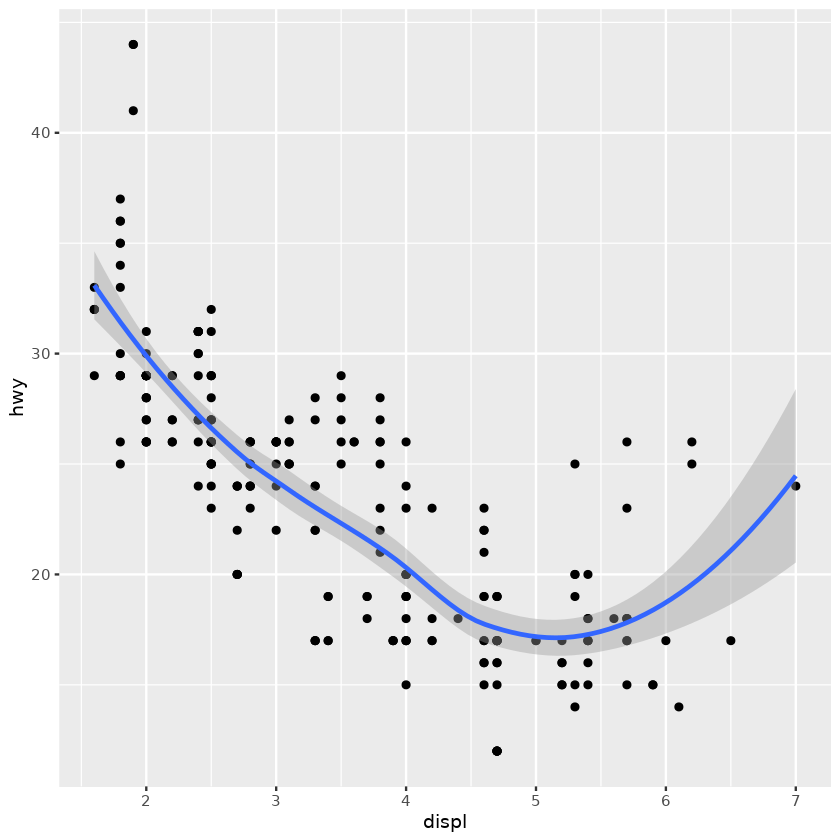

In [77]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

# Working with some real-world data
## Dilution Plating Data

In [83]:
fname = '/dfs6/pub/erebboah/cosmos/visualization/DilPlate_Smar13880.txt'
df = read_tsv(fname)
head(df)


-- Column specification --------------------------------------------------------
cols(
  OD = col_double(),
  Day = col_double(),
  CFU = col_double(),
  InjDate = col_character()
)




OD,Day,CFU,InjDate
<dbl>,<dbl>,<dbl>,<chr>
0.05,2,2833,5/18/19
0.05,2,8083,5/18/19
0.05,2,1022,5/18/19
0.05,2,5472,5/18/19
0.05,2,5250,5/18/19
0.50,2,7166,5/18/19


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



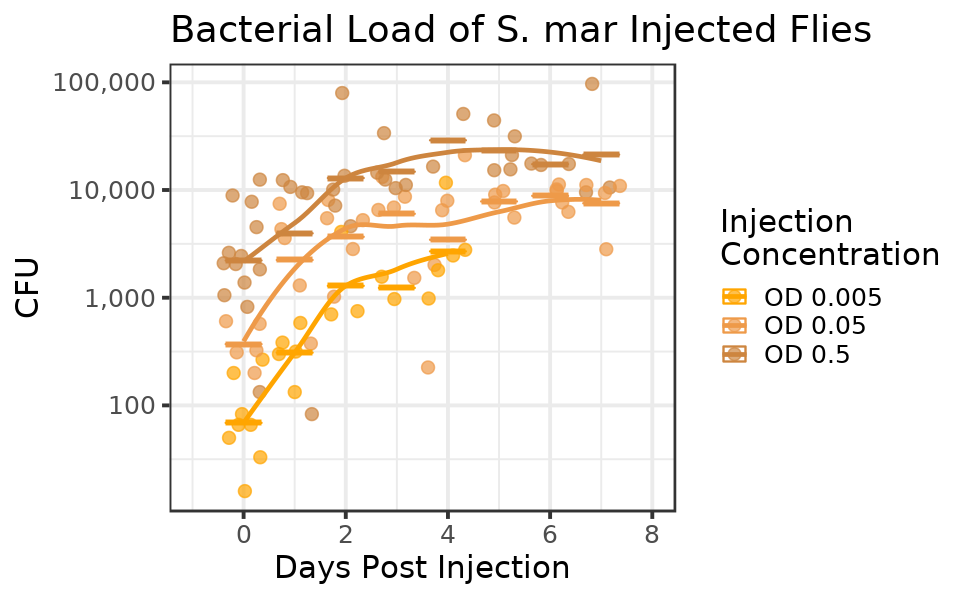

In [91]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(df, aes(Day, CFU, color=as.factor(OD))) +
  geom_jitter(cex=3, alpha = 0.7) +
  stat_summary(fun = mean, fun.min = mean, fun.max = mean,
               geom = "crossbar", width = 0.7) +
  #stat_summary(fun.data="mean_sdl", 
               #geom="crossbar", width=0.5) +
  theme_bw(base_size = 18) +
  scale_y_log10(labels=scales::comma) +
  scale_x_continuous(name="Days Post Injection", limits=c(-1, 8)) +
  geom_smooth(se=FALSE) +
  ylab("CFU") +
  ggtitle("Bacterial Load of S. mar Injected Flies") + 
  scale_color_manual(name="Injection\nConcentration", 
                     breaks=c("0.005", "0.05", "0.5"),
                     labels=c("OD 0.005", "OD 0.05", "OD 0.5"),
                     values=c("orange", "tan2", "tan3"))